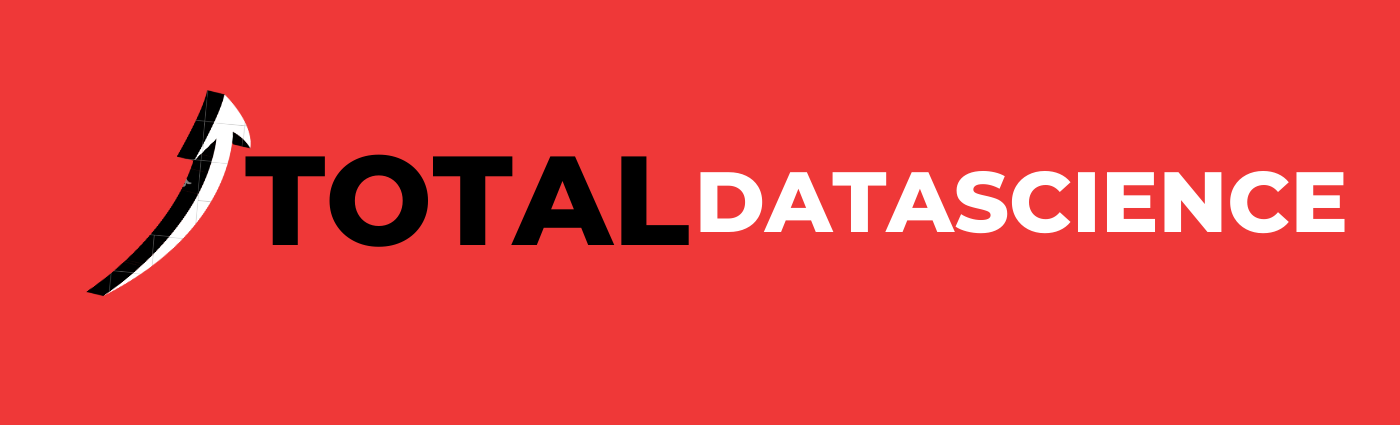

#**Data Leakage**

Data leakage is one of the most difficult problems when developing a machine learning model. It happens when you train your algorithm on a dataset that includes information that would not be available at the time of prediction when you apply that model to data you collect in the future.

In a more simpler term, data leakage happens when we accidentally share information between the test and training data-sets while creating the model. 

*“Any other feature whose value would not actually be available in practice at the time you’d want to use the model to make a prediction is a feature that can introduce leakage to your model.”* – Data Skeptic

##Why is Data Leakage Important To Know?

* It causes a model to overrepresent its generalization error, which makes it useless for any real-world application.
Therefore caution must be taken, else when deployed in production for any application will cause the application to fail miserably.

* It can make investor make bad investment and cause huge financial cost. 

* It is practically deadly in the healthcare sector and may make predictions that can cause lives of humans.
* It can make wrong predictions on customer behaviours which will make buiness leaders take wrong decisions that can push the business into debt or at worse eventually collapse their business.

**Data Leakage** is therefore one of the most important concepts to know as a Data Scientist or Machine Learning Engineer.


##How do I know if am having Data Leakage?

Data leakage often results in unrealistically high levels of performance on the test set and this is because the model is being ran on data that it had already seen to some extent in the training set.

It had already memorised the patterns and everything, so why not? It will definetly perform well.

However, this definetly misleading, and this model will fail to generalise when deployed in production.

##How did I end up in Data Leakage?


There are several **Causes** of *Data Leakage* which includes:

* Duplicates
* Leaky Predictors
* Pre-processing activities



---

**Duplicates**

Duplicate values are a common problem when dealing with real world datasets. You can't run away from it. This normally occurs when your dataset contains several points which are identical.

For example if you are working with customer reviews dataset for sentiment analysis, it is very likely to find customers who have written same reviews for a product different times, partly because some product owners ask them to write more reviews so that they will get sales, or maybe the customer just like or dislike the product and keeps writing same positive or negative reviews over and over again.

In this situation, you may experience data leakage due to the fact that your train and test set may contain the same data point even though they may correspond to different observations. 
Which will fail when you use it in production to test new sets of reviews.


---



**Leaky Predictors**

You may not explicitly leak your data, however, you can still experience data leakage especially if there are dependencies between your test and train set. This mostly happens when you are dealing with data where time is important(like time-series data).

Leaky Predictors include data that will not be available at the time you make predictions.




In [ ]:

#let's create some dummy data
df={'Purchase':['yes','yes','no','yes','no','yes','yes'],'QTY':[2,5,17,4,0,3,7],'Product':['Milk','Sugar','Biscuit','Chocoalte','Coffee','Bread','Egg'],'Discount':['yes','no','no','yes','no','yes','yes']}

In [ ]:

#convert the dummy data into a Pandas Dataframe
import pandas as pd

df=pd.DataFrame(df)

In [ ]:

#let's see our data
df

,Purchase,QTY,Product,Discount
0,yes,2,Milk,yes
1,yes,5,Sugar,no
2,no,17,Biscuit,no
3,yes,4,Chocoalte,yes
4,no,0,Coffee,no
5,yes,3,Bread,yes
6,yes,7,Egg,yes


People will mostly buy a product when they a good discount and the product is what they need. If you look at the data we have above, most of the people who got ***Discount*** also ***Purchased*** the product. 

Let's check the relationship or correlation between the two features below:

In [ ]:
#@title
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
purch = le.fit_transform(df['Purchase'])
dis = le.fit_transform(df['Discount'])
prod=le.fit_transform(df['Product'])
df['Purchase']=purch
df['Discount']=dis
df['Product']=prod

In [ ]:
df

,Purchase,QTY,Product,Discount
0,1,2,5,1
1,1,5,6,0
2,0,17,0,0
3,1,4,2,1
4,0,0,3,0
5,1,3,1,1
6,1,7,4,1


In [ ]:
df.corr()

,Purchase,QTY,Product,Discount
Purchase,1.000000,-0.377135,0.474342,0.730297
QTY,-0.377135,1.000000,-0.485363,-0.320256
Product,0.474342,-0.485363,1.000000,0.000000
Discount,0.730297,-0.320256,0.000000,1.000000


We can see that there is a very strong relationship between these two features(**Purchase** and **Discount**), about **0.7** while the other feature has very less correlation **-0.3**. 

Having a high relationship is actually a good thing, for instance if we want to build a model that will predict whether a customer will purchase a product or not, this variable will help us to get a good prediction with our dataset.

However, we should also note that discount is normally given based on certain conditions, like festive seasons, customer type, or it can run for a certain period of time.
In short, discounts are not mostly available all the time. 


Considering the relationship or correlation between the two features(**Purchase** and **Discount**), if we build a model to predict wether a customer will *purchase an item or not* based on the given data, the model would see that anyone who has a discount is highly likely to purchased an item. Validation data comes from the same source, so the pattern will repeat itself in validation, and the model will have great validation scores. But the model will fail when we deploy in the real world, since data that will come later on might not have discount.



---


<br>

##**Pre-processing activities**

Probably the most common cause of **Data Leakage** is happens during data pre-processing steps of machine learning.

<br>

**Approach 1**

Most of the time, we 
* prepare our data 
* split it into training and testing set and
* build and evalute our model

While this is mostly done in most machine learning problems, it exposes our test or validation set to the model while training and typically leads to ***Data Leakage***. 

Taking for instance data nomalisation, where we will like to normalise our data in such a way that it has a range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0.

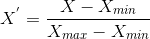
<br>

**Xmax**= maximum value

**Xmin**= Minimum value 

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1.


Now when we normalize our data, this requires that we first calculate the minimum and maximum values for each variable before using these values to scale the variables. After that, we split our dataset into train and test sets, but the examples in the training set know something about the data in the test set, i.e. they have been scaled by the global minimum and maximum value and they somehow know something about every data point.

Again, standardization estimates the mean and standard deviation values from the dataset in order to scale the variables. 
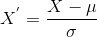

image.png is the mean of the feature values and image.pngis the standard deviation of the feature values. 
Each data point will have a taste of another, whether in train set or test set.

Also **missing value** imputation gives same problem.

This happens with almost all data preparation techniques.

<br>

**Approach 2**

**We can therefore reorganise our process in this way:**
* Split data into training and testing set .
* Perform Data Preparation on training set.
* Fit the model on the training set.
* Evaluate Models on the test/validation set.

<br>

Let's see an example below:

##**Approach 1**: The Wrong Way

First, let's try the ***approach 1*** and evalute our results.

i.e. 

* prepare our data 
* split it into training and testing set and
* build and evalute our model

We will use the ***MinMaxScaler*** function to scale our data into the range of **0-1**

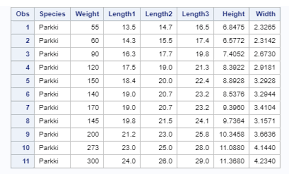



---

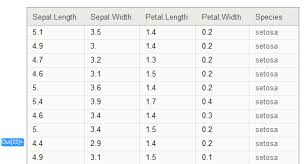




---



---



We will use the *sklearn's* ***make_classification()*** function to create the dataset with 1,000 records and 10 features.

In [ ]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=20)

In [ ]:
#let's see the shape of the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# standardize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test sets with 80% for traing and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.linear_model import LogisticRegression
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate the model
y_pred = model.predict(X_train)
# evaluate predictions on train set
accuracy = accuracy_score(y_train, y_pred)
print('Model Accuracy on Training set: %.2f' % (accuracy*100))

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model Accuracy on Test set: %.2f' % (accuracy*100))

Model Accuracy on Training set: 88.38
Model Accuracy on Test set: 91.50


##**Approach 2**: The Right Way

Step1: We  will first split the data into train and test sets.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=20)

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


Atep 2: We now scale our data using the **MinMaxScaler**

In [ ]:
# define the scaler
scaler = MinMaxScaler()
# fit on the training data
scaler.fit_transform(X_train)
# scale the test x_text data
X_test = scaler.transform(X_test)

**NB**: We did not scale the **y_test** since we want it to represent real world dataset and we can use it for testing or validation. Also in most of the cases, you will not need to scale the **y_train** since it will already be in small range and scaling the **X_test* and **x_train** is enough to get going.
However, depending on your dataset and problem statement, you can scale the y_trian **BUT NOT before splitting**.

In [ ]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# evaluate the model
y_pred = model.predict(X_train)
# evaluate predictions on train set
accuracy = accuracy_score(y_train, y_pred)
print('Model Accuracy on Training set: %.2f' % (accuracy*100))

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model Accuracy on Test set: %.2f' % (accuracy*100))

Model Accuracy on Training set: 88.62
Model Accuracy on Test set: 48.00


Now we can see that the reality of the model is being revealed. Our model is overfitting but since in the **approach 1**, our model has tasted both the traing and test set, it has memorise the pattern and it was still doing well, however, the **approach 2** has revealed to us that our model wont work in production, it will fail misearble so we need to tune the model.


##**Using Cross-Validation**

**K-fold cross-validation** involves splitting a dataset into **K** non-overlapping groups of rows. After that, ***you train your model on all but one group*** to form a training dataset, then evaluate the model on the hold-out fold. You repeat this process couple of times so that each fold is given a chance to be used as the holdout test set. You finally average performance across all evaluations.

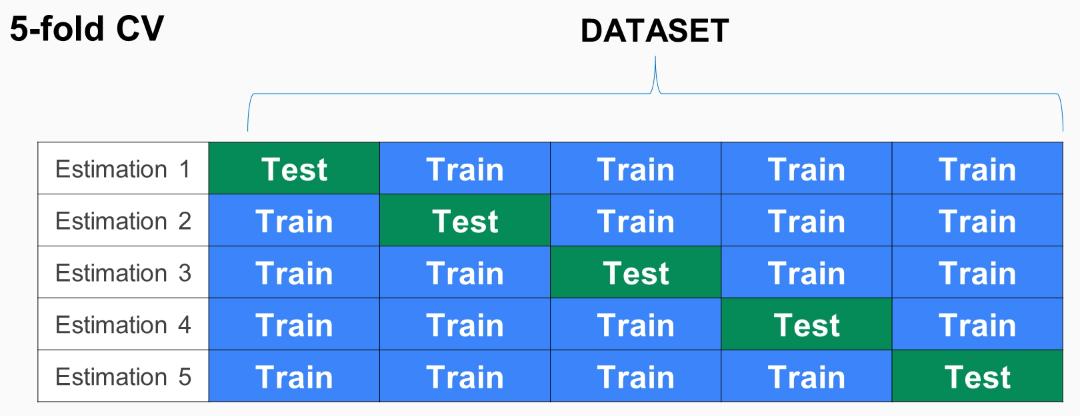

###**Approach 1**: The Wrong Way

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=20)

In [ ]:
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=50)
# evaluate the model using cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)


In [ ]:
# check performance
import numpy as np

print('Accuracy: %.2f ' % (np.mean(scores)*100))


Accuracy: 88.76 


###**Approach 2**: The Right Way

In [ ]:
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# check performance
print('Accuracy: %.2f' % (np.mean(scores)*100))

Accuracy: 85.43


Running the example normalizes the data correctly within the cross-validation folds of the evaluation procedure to avoid data leakage.

With the two accuracies, we can expect the **approach 2** with accuracy of **85** to perform well in production that **approach 1** even with the accuracy of **88**